# In-class Exercises

## Make your own corpus

Our first stop will be to Project Gutenburg, and selecting Don Quixote: https://www.gutenberg.org/ebooks/996 and downloading the text version: https://www.gutenberg.org/cache/epub/996/pg996.txt

### Requesting the text of Don Quixote from the Internet

In [1]:
# Here's how we request the text
from urllib.request import urlopen

In [2]:
my_url = 'https://www.gutenberg.org/cache/epub/996/pg996.txt'

In [3]:
file = urlopen(my_url)

In [4]:
type(file)    # not ready for us to use based on type

http.client.HTTPResponse

In [5]:
# Need python to read this 
raw = file.read()    # Now it's bytes! Yikes!

In [6]:
type(raw)

bytes

In [7]:
# We want the text to be in characters, so we need to decode/encoding
don_quixote = raw.decode()   # because it's in UTC-8, we don't need to pass an argument to decode

In [9]:
type(don_quixote)     # Now it's a string, yes!

str

In [19]:
don_quixote[:500]     # first 100 characters

'\ufeffThe Project Gutenberg eBook of The History of Don Quixote, by Miguel de Cervantes\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are'

Notice that we don't have paragraphs, and instead have escapes like new lines '\n', returns '\r' and '\u' . Space is a character itself, which is why we see them.

### Preparing out document for NLTK

We want to have the text available as a list.

In [20]:
import nltk

In [21]:
don_tokens = nltk.word_tokenize(don_quixote)

In [22]:
type(don_tokens)    # Nice, it's a list now, which gets us somewhere

list

In [23]:
len(don_tokens)

498734

In [25]:
don_tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'History',
 'of',
 'Don',
 'Quixote']

In order to use NLTK, we may want to make it the right type. We also want to get rid of front matter etc.

In [26]:
# This is one way to get the index for the first word, the KP way. Error prone
don_tokens.index('It')    # this is the first word 

273

In [27]:
# In class
dq_text = don_tokens[382:]    # we decided this is fine to cut out front matter

In [29]:
dq_nltk_text = nltk.Text(dq_text)   # make it the right type for nltk

In [30]:
type(dq_nltk_text)

nltk.text.Text

In [32]:
from nltk.probability import FreqDist

In [33]:
my_dist = FreqDist(dq_nltk_text)

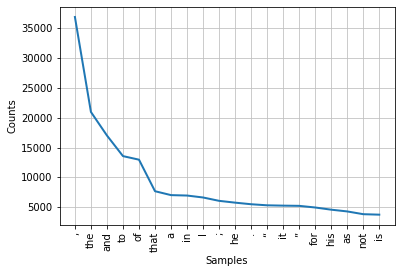

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
my_dist.plot(20)

In [35]:
dq_nltk_text.similar('Don')

sancho won the that it can governor a curate him them if all i is
barber his world one this


Of course, we haven't removed any stop words, but we're able to use NLTK functions and methods. We may need to remove stopwords if we want to look at lexical density. If we wanted to look at parts of speech, we probably don't want to remove those stopwords.